In [2]:
import pandas as pd
from gspread_pandas import Spread
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
s=Spread('weather','Weather Data')

In [4]:
s.open_sheet(0)

In [5]:
df=s.sheet_to_df()

In [6]:
df.head()

,DATE,TIME,TEMPERATURE,HUMIDITY,PRESSURE,ALTITUDE,MOISTURE,WATER SUPPLIED
ID,,,,,,,,
1,04/04/2019,6:36:53,30.6,73,29.71,54.01,1024,
2,04/04/2019,6:46:43,30.6,73,29.71,53.92,1024,
3,04/04/2019,6:58:54,30.4,74,29.71,54.01,1024,
4,04/04/2019,7:10:43,30.4,74,29.71,54.59,1024,
5,04/04/2019,7:20:32,30.4,73,29.71,54.26,1024,


In [38]:
y=df.iloc[0:35,2].values.astype('float')
y.mean()


30.55428571428571

In [24]:
y.shape

(34,)

In [65]:
df1=df.iloc[:,2:]
df1.head()

,TEMPERATURE,HUMIDITY,PRESSURE,ALTITUDE,MOISTURE,WATER SUPPLIED
ID,,,,,,
1,30.6,73,29.71,54.01,1024,
2,30.6,73,29.71,53.92,1024,
3,30.4,74,29.71,54.01,1024,
4,30.4,74,29.71,54.59,1024,
5,30.4,73,29.71,54.26,1024,


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 1 to 203
Data columns (total 8 columns):
DATE              203 non-null object
TIME              203 non-null object
TEMPERATURE       203 non-null object
HUMIDITY          203 non-null object
PRESSURE          203 non-null object
ALTITUDE          203 non-null object
MOISTURE          203 non-null object
WATER SUPPLIED    203 non-null object
dtypes: object(8)
memory usage: 24.3+ KB


In [60]:
df1.iloc[:,2].dtype

dtype('O')

In [152]:
df['WATER SUPPLIED']='0.0'

In [154]:
df.head()

,DATE,TIME,TEMPERATURE,HUMIDITY,PRESSURE,ALTITUDE,MOISTURE,WATER SUPPLIED
ID,,,,,,,,
1,04/04/2019,6:36:53,30.6,73,29.71,54.01,1024,0.0
2,04/04/2019,6:46:43,30.6,73,29.71,53.92,1024,0.0
3,04/04/2019,6:58:54,30.4,74,29.71,54.01,1024,0.0
4,04/04/2019,7:10:43,30.4,74,29.71,54.59,1024,0.0
5,04/04/2019,7:20:32,30.4,73,29.71,54.26,1024,0.0


In [87]:
df1=df[['TEMPERATURE','HUMIDITY','PRESSURE','ALTITUDE','MOISTURE','WATER SUPPLIED']].astype('float')

In [88]:
df1.shape

(203, 6)

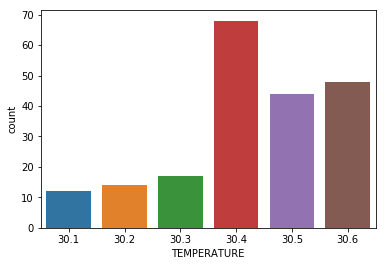

In [89]:
sns.countplot('TEMPERATURE',data=df1)

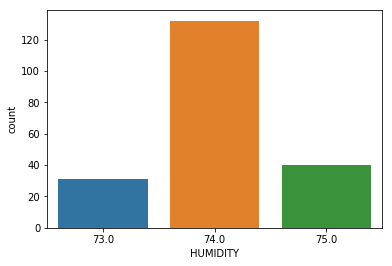

In [90]:
sns.countplot('HUMIDITY',data=df1)

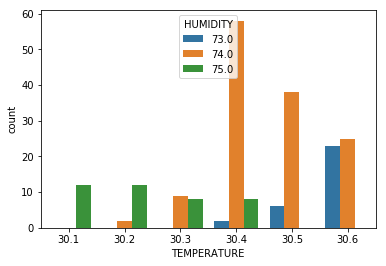

In [95]:
sns.countplot('TEMPERATURE',data=df1,hue='HUMIDITY')

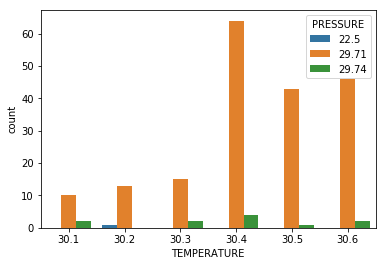

In [96]:
sns.countplot('TEMPERATURE',data=df1,hue='PRESSURE')

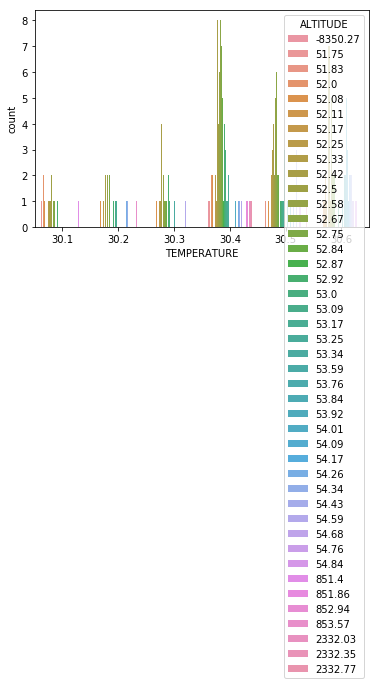

In [97]:
sns.countplot('TEMPERATURE',data=df1,hue='ALTITUDE')

In [98]:
X=df1.iloc[:,:].values
X

array([[  30.6 ,   73.  ,   29.71,   54.01, 1024.  ,    0.  ],
       [  30.6 ,   73.  ,   29.71,   53.92, 1024.  ,    0.  ],
       [  30.4 ,   74.  ,   29.71,   54.01, 1024.  ,    0.  ],
       ...,
       [  30.4 ,   74.  ,   29.71,   52.84, 1024.  ,    0.  ],
       [  30.4 ,   74.  ,   29.71,   53.25, 1024.  ,    0.  ],
       [  30.4 ,   74.  ,   29.71,   53.09, 1024.  ,    0.  ]])

In [101]:
y=df1.iloc[:,5].values
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [102]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=98)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [103]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
X_test[0]

array([  30.1 ,   75.  ,   29.71,   52.08, 1024.  ,    0.  ])

In [105]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [106]:
regressor.predict([[  30.1 ,   75.  ,   29.71,   52.08, 1024.  ,    0.  ]])

array([0.])

In [112]:
from sklearn.metrics import r2_score
y_pred=regressor.predict(X_test)
r2_score(y_test,y_pred)

1.0

In [113]:
from sklearn.tree import DecisionTreeRegressor
regressor2=DecisionTreeRegressor()

In [114]:
regressor2.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [115]:
y_pred=regressor2.predict(X_test)

In [116]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0

In [117]:
from sklearn.ensemble import RandomForestRegressor
regressor3=RandomForestRegressor(n_estimators=300)

In [118]:
regressor3.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [119]:
y_pred3=regressor3.predict(X_test)

In [120]:
r2_score(y_test,y_pred3)

1.0

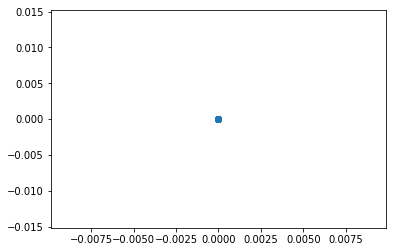

In [121]:
plt.scatter(y_test,y_pred3)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


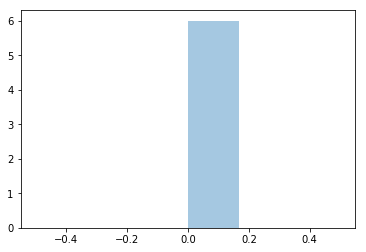

In [122]:
sns.distplot((y_test-y_pred3))